In [121]:
from importlib import reload
import futils.loaders as loaders
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
reload(loaders)
data = loaders.load_gnina_across_seeds("/home/qzj517/POR-DD/data/gnina_processed/seed_experiment")
for key, df in data.items():
    df["experiment"] = [int(key.replace("seed_", "").replace(".txt", ""))]*len(df)
data = pd.concat(df for df in data.values())
mols = loaders.load_mols_across_seeds("/home/qzj517/POR-DD/data/equibind_processed/seed_experiment")
mols = pd.DataFrame(mols)
mols = mols.rename(mapper = lambda s: int(s.replace("seed_", "")), axis=1)
mols = mols.reindex(sorted(mols.columns), axis = 1)
f = lambda mol: mol.GetConformer().GetPositions()
molcoords = mols.applymap(f)
newdf = pd.DataFrame()
ref = molcoords[0]
for col in molcoords:
    newdf[col] = ((molcoords[col] - ref)**2).apply(np.sum)
n_exactly_eq_to_seed_0 = (newdf == 0).apply(np.all, axis = 1).sum()

In [29]:
data = data.sort_values("experiment")

In [49]:
stds = data.groupby(level = 0).std()[["CNNscore", "CNNaffinity"]]

In [50]:
means = data.groupby(level = 0).mean()[["CNNscore", "CNNaffinity"]]

(array([910.,  22.,  44.,  51.,  57.,  57.,  33.,  23.,  10.,   6.]),
 array([0.        , 0.02943668, 0.05887337, 0.08831005, 0.11774674,
        0.14718342, 0.1766201 , 0.20605679, 0.23549347, 0.26493016,
        0.29436684]),
 <BarContainer object of 10 artists>)

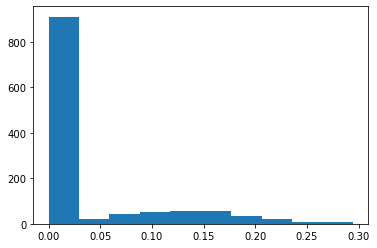

In [52]:
plt.hist(stds["CNNscore"])

(array([961., 131.,  47.,  17.,  14.,  14.,  12.,  11.,   3.,   3.]),
 array([0.        , 0.10675174, 0.21350348, 0.32025522, 0.42700695,
        0.53375869, 0.64051043, 0.74726217, 0.85401391, 0.96076565,
        1.06751739]),
 <BarContainer object of 10 artists>)

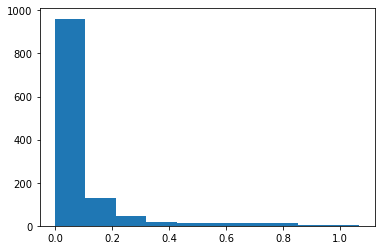

In [55]:
plt.hist(stds["CNNaffinity"])

In [119]:
sum(stds["CNNscore"]==0)

897

In [120]:
n_exactly_eq_to_seed_0

NameError: name 'n_exactly_eq_to_seed_0' is not defined